# Big O notation

是一種衡量演算法效率的標記方式。

## Time Complexity

詳細來講就是根據你輸入的資料大小為參數來表示你的演算法耗費時間的**成長速率**，切記並非整體的實際耗費時間，每一行程式指令都會有其消耗時間，但是我們只注意在根據輸入資料的大小而有所變動的執行指令次數（影響效率）。


常見的有以下幾種

| Big O    | Name        |
| --       |  --         |
| 1        | constant    |
| log(n)   | logarithmic |
| n        | Linear      |
| n log(n) | log linear  |
| n^2      | quadratic   |
| n^3      | cubic       |
| 2^n      | exponential |


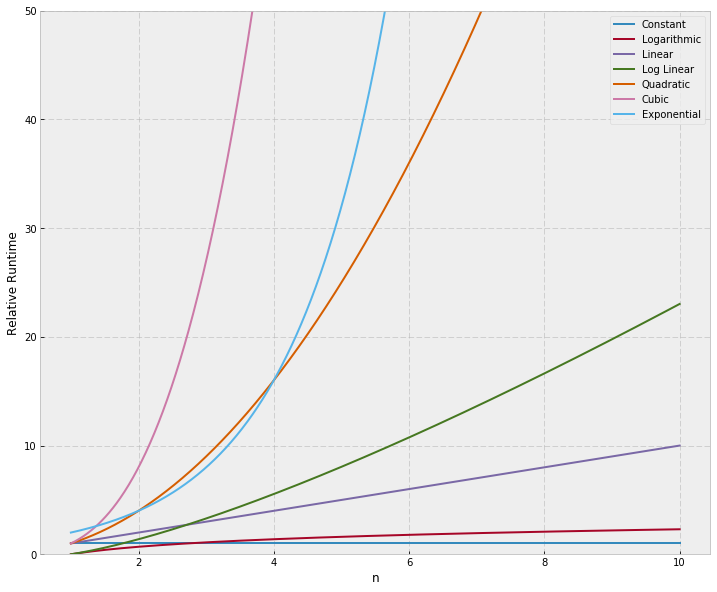

In [22]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Set up runtime comparisons
n = np.linspace(1,10,1000)
labels = ['Constant','Logarithmic','Linear','Log Linear','Quadratic','Cubic','Exponential']
big_o = [np.ones(n.shape),np.log(n),n,n*np.log(n),n**2,n**3,2**n]

# Plot setup
plt.figure(figsize=(12,10))
plt.ylim(0,50)

for i in range(len(big_o)):
    plt.plot(n,big_o[i],label = labels[i])


plt.legend(loc=0)
plt.ylabel('Relative Runtime')
plt.xlabel('n')

上圖使用線圖展示runtime上升率，可以明顯看出當n越來越來大時，明顯不同效率演算法runtime差異越大，下面就來舉例

## Example BigO (1) 

In [23]:
def alg_contant(lst):
    print(lst[0])
    
alg_contant([1,2,3,4,5])

1


這裡我們的input都設定為陣列，再來看看alg_contant，他只是簡單的做印出陣列第一個元素這樣的事情，無論今天lst變得怎樣大，都不會影響他的執行次數，也就是他的runtime不會隨之成長，因此效率為BigO(1)

## Example BigO(n)

In [24]:
def alg_linear(lst):
    for i in lst:
        print(i)
        
alg_linear([1,2,3,4,5])

1
2
3
4
5


從函式可以看出，隨著lst的大小越大，for迴圈裡面的print次數也會跟著成長，size是n就會執行n次，因此效率為BigO(n)

## Example BigO(n^2)

In [25]:
def alg_quadratic(lst):
    for x in lst:
        for y in lst:
            print('{} {}'.format(x, y))
            
alg_quadratic([1,2,3])

1 1
1 2
1 3
2 1
2 2
2 3
3 1
3 2
3 3


從函式可以看出，size為n的lst，print的次數將會是n^2，因此效率為BigO(n^2)

# Calculating the scale of BigO Notation

前面的函式都是很簡單的print，並沒有多餘的其餘程式碼，因此下面就來看一下稍稍複雜點的程式該如何計算其複雜度

In [26]:
def alg_3_linear(lst):
    for i in lst:
        print(i)
    
    for i in lst:
        print(i)
        
    for i in lst:
        print(i)
        
alg_3_linear([1,2])

1
2
1
2
1
2


alg\_3\_linear，可以看出他會執行3*n次的print，但是隨著n變大，3並不是主要影響次數成長的因素，主要還是迴圈的執行次數n，因此仍然會用BigO(n)來表示，當然省略3，並不是講說那個常數沒啥影響，只是相對n來講，並不是影響主因，

$$ f(x)= O(g(x)), \qquad  0 \leq f(x) \leq c.g(x) , \quad x>x_0 $$

其實從定義上來看，BigO是一個upper bound asymptotic，也略知一二，c就是常數對他這個標記法而言，並不是最重要的地方，因為當 $ x \rightarrow \infty $，常數就顯得不重要，下面來看看另外一個更明顯的例子


In [27]:
def alg_complex_linear(lst):
    print(lst[0])
    
    for i in lst[len(lst)//2:]:
        print(i)
    
    for i in range(10):
        print('wow')
        
alg_complex_linear([1,2,3,4,5])

1
3
4
5
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow


今天我帶入的參數很小時，你會發現wow的次數反而是比較多的，但是隨著lst的內容越來越大時，你會發現 `for i in lst[len(lst)//2]` 逐漸是影響效率最重要的因素（次數執行最多），這個演算法的效率是 $ O(1+n/2+10) $ ，所以最後還是O(n)

## Worst Case vs. Best Case

一個演算法是會擁有其最佳狀況和最糟狀況，通常而言我們只會注意其最糟狀況，上面我舉的例子其實不會有最佳或最糟，因為太簡單，一般像是搜尋或是排序演算法就會有這種狀況了，以下舉例

In [28]:
def eleIsIn(lst, value):
    for ele in lst:
        if value == ele:
            return True
        
    return False

lst = [1,2,3,4,5,6]

eleIsIn(lst, 1)

True

In [29]:
eleIsIn(lst, 6)

True

你會發現一個迴圈裡面判斷式執行一次就找到，另一個則是六次（等於lst的size），根據lst的內容是否經過排序，以及要找的value，最佳跟最差狀況會差很多，但是對於一個演算法我們一般是會以他的平均狀況來當作他的效率。


## Space complexity

標記法是跟演算法一樣的方式，不是每一行指令都會需要使用到空間的，像是`print`就不會使用到，以下舉個例

In [30]:
def create_lst(n):
    res = []
    
    for i in range(n):
        res.append(i)
        
    return res

create_lst(5)

[0, 1, 2, 3, 4]

這個space complexity就是O(n)，跟演算法時間複雜度類似的推算方式

 - [Big O notation explanation](http://stackoverflow.com/questions/487258/plain-english-explanation-of-big-o/487278#487278)
 - [Big O example](http://stackoverflow.com/questions/2307283/what-does-olog-n-mean-exactly)
 - [cheat sheet](http://bigocheatsheet.com/)
 